# Project - Unsupervised Learning

### Submitted by - Abhik Kar 
#### Dated - 17-May-2020

#### Domain - Object recognition
* Data from silhouette of vehicles in different angles
* Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars

##### Problem Statement
* The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

##### Solution
Apply dimensionality reduction technique – PCA and train a model using principle components

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from os import system
from scipy.stats import zscore
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read the csv file into a dataframe 'cust'
vehicle_raw=pd.read_csv("vehicle.csv")

## Exploratory Data Analysis

In [3]:
print(vehicle_raw.shape)

(846, 19)


In [4]:
vehicle_raw.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [5]:
vehicle_raw.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [6]:
vehicle_raw.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [7]:
vehicle_raw.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [8]:
vehicle_raw['class']=vehicle_raw['class'].astype('category')

In [9]:
vehicle_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

### Missing Value Analysis

In [10]:
vehicle_raw.isnull().values.any()

True

In [11]:
vehicle_raw.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

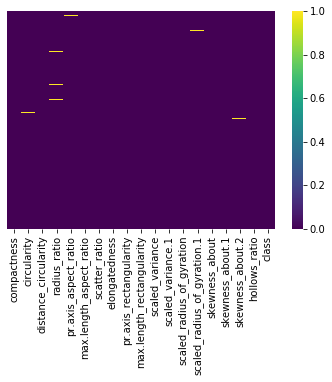

In [12]:
sns.heatmap(vehicle_raw.isnull(), yticklabels=False, cmap="viridis")

#### Observation:
* Missing value present in many attributes
* Need to identify what kind of missing values are these

In [13]:
vehicle_raw[vehicle_raw.isnull().any(axis=1)]

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
66            81         43.0                  68.0         125.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
141           81         42.0                  63.0         125.0   
159           91         45.0                  75.0           NaN   
177           89         44.0                  72.0         160.0   
192           93         43.0                  76.0         149.0   
207           85         42.0                   NaN         121.0   
215           90         39.0                  86.0         169.0   
222          100         50.0                  81.0         197.0   
237           85         45.0                  65.0         128.0   
249           85         34.0                  53.0         127.0   
266           86          NaN                  65.0         116.0   
273           96         45.0                  80.0         162.0   
285           89         48.0                  85.0         189.0   
287           88         43.0                  84.0           NaN   
308          109         51.0                 100.0         197.0   
319          102         51.0                   NaN         194.0   
329           89         38.0                  80.0         169.0   
345          101         54.0                 106.0           NaN   
372           97         47.0                  87.0         164.0   
396          108          NaN                 106.0         177.0   
419           93         34.0                  72.0         144.0   
467           96         54.0                 104.0           NaN   
496          106         55.0                  98.0         224.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
66                   57.0                        8          149.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
141                  55.0                        8          149.0   
159                  57.0                        6          150.0   
177                  66.0                        7          144.0   
192                  57.0                        7          149.0   
207                  55.0                        7          149.0   
215                  62.0                        7          162.0   
222                   NaN                        6          186.0   
237                  56.0                        8          151.0   
249                  58.0                        6            NaN   
266                  53.0                        6          152.0   
273                  63.0                        9          146.0   
285                  64.0                        8          169.0   
287                  55.0                       11          154.0   
30

#### Observation:
* Clearly all Missing values are NaN and hence need to be replaced with Median

In [14]:
for i in vehicle_raw.columns[:17]:
    median_value = vehicle_raw[i].median()
    vehicle_raw[i] = vehicle_raw[i].fillna(median_value)

In [15]:
vehicle_raw.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

#### Observation:
* No Longer Missing Values are present
* Data is ready for univariate, bivariate and multivariate analysis

### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002864396D248>,
      dtype=object)

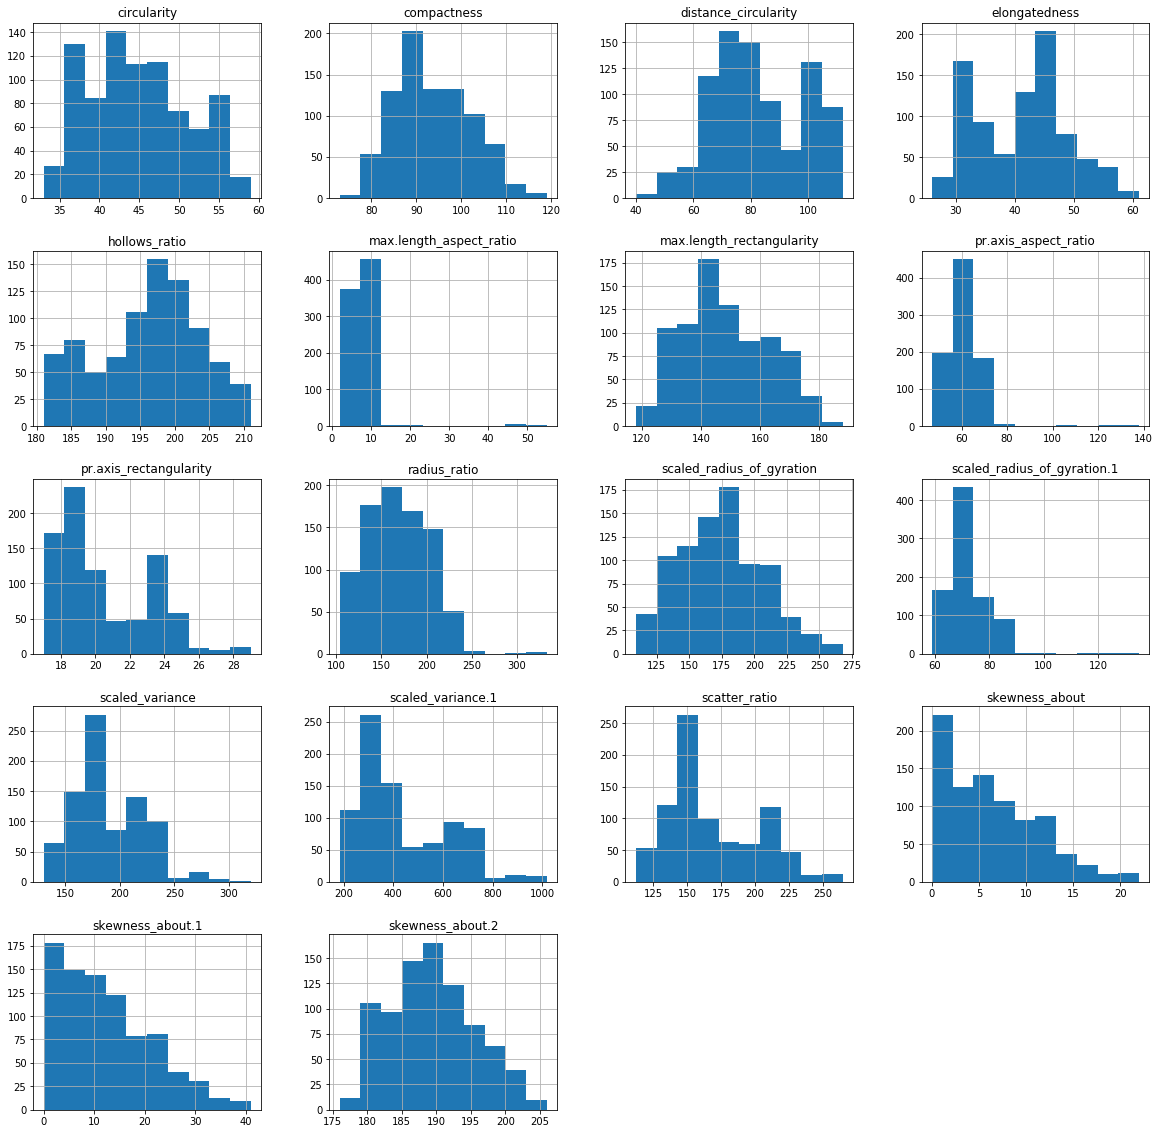

In [16]:
vehicle_raw.hist(figsize=(20,20))

#### Observation:
* Many attributes have logn tail and therefore outliers are present. 
* Some are normally distributed

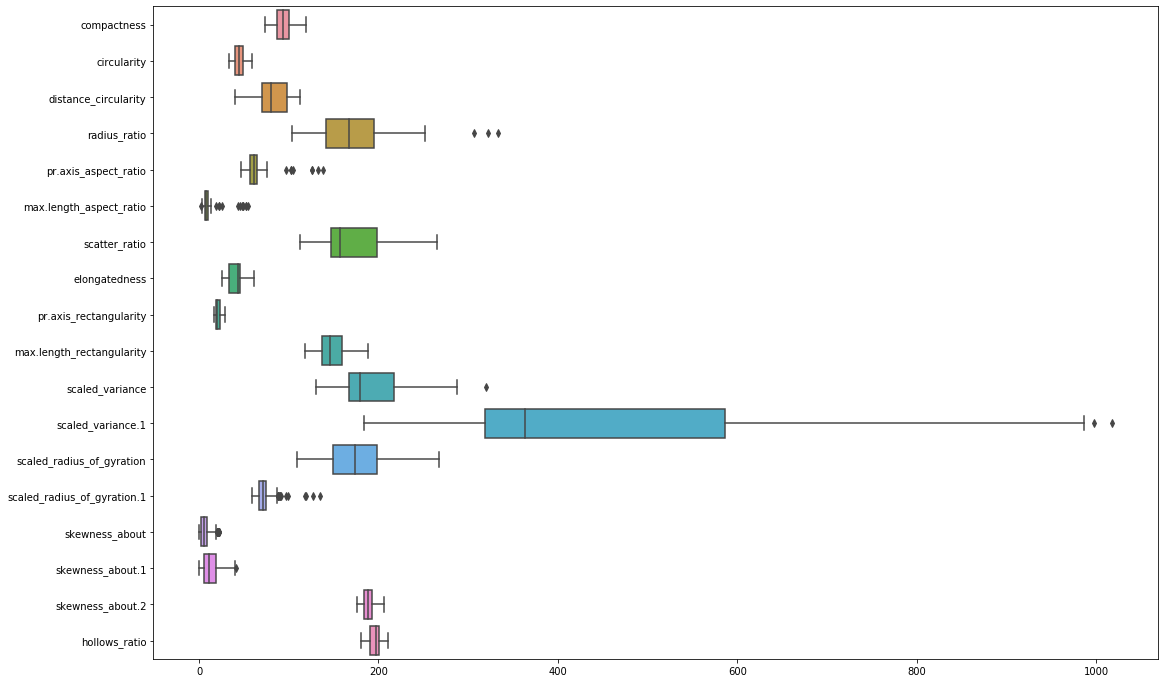

In [17]:
fig = plt.figure(figsize = (18, 12))
ax = sns.boxplot(data = vehicle_raw.iloc[:, 0:18], orient = 'h')

### Observation:
* There are outlier present in radius_ratio , pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, scaled_radius_of_gyration.1, skewness_about and skewness_about.1

### Outlier Treatment

In [18]:
for vehicle_col in vehicle_raw.columns[:-1]:
    q1 = vehicle_raw[vehicle_col].quantile(0.25)
    q3 = vehicle_raw[vehicle_col].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    vehicle_raw.loc[(vehicle_raw[vehicle_col] < low) | (vehicle_raw[vehicle_col] > high), vehicle_col] = vehicle_raw[vehicle_col].median()

* Remove all outliers with median

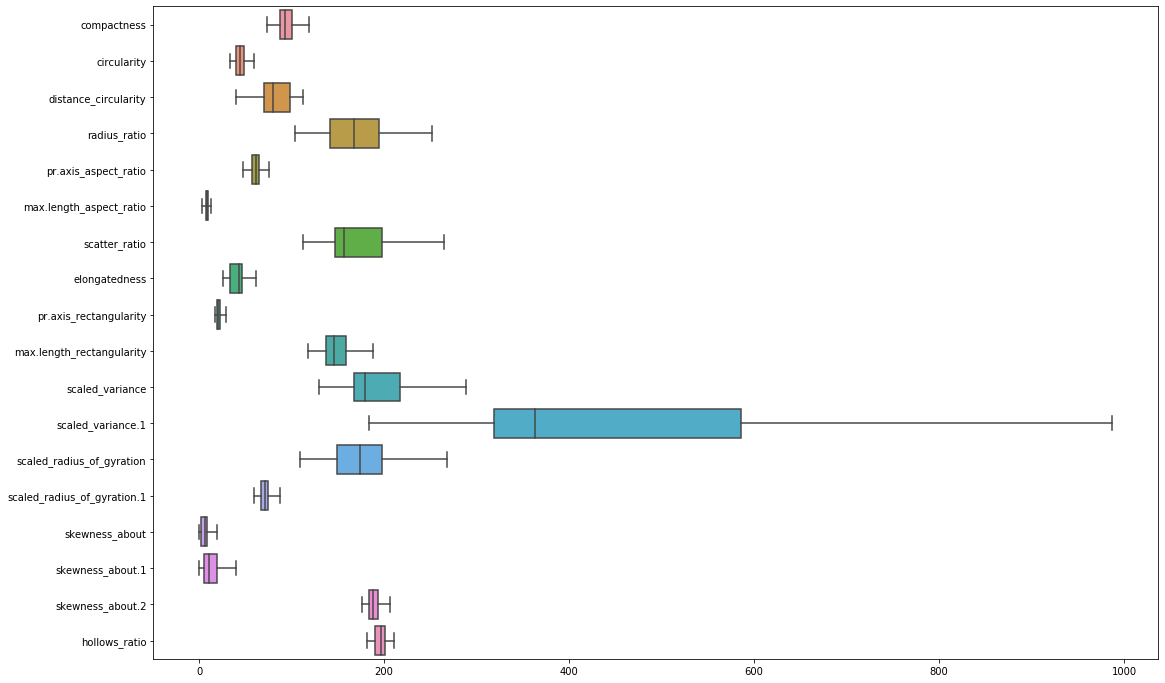

In [19]:
fig = plt.figure(figsize = (18, 12))
ax = sns.boxplot(data = vehicle_raw.iloc[:, 0:18], orient = 'h')

#### Observation:
* No longer outliers are present and boxplots shows data falls within whiskers 

In [20]:
vehicle_raw["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

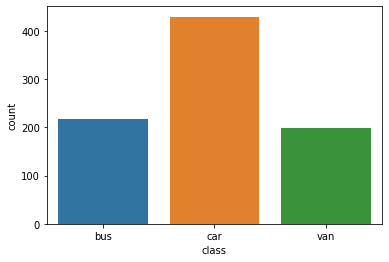

In [21]:
sns.countplot(vehicle_raw['class'])

#### Observation:
* There are three segments in this class Bus, Car & Van
* Hence three gaussians will be visible in dustribution of data

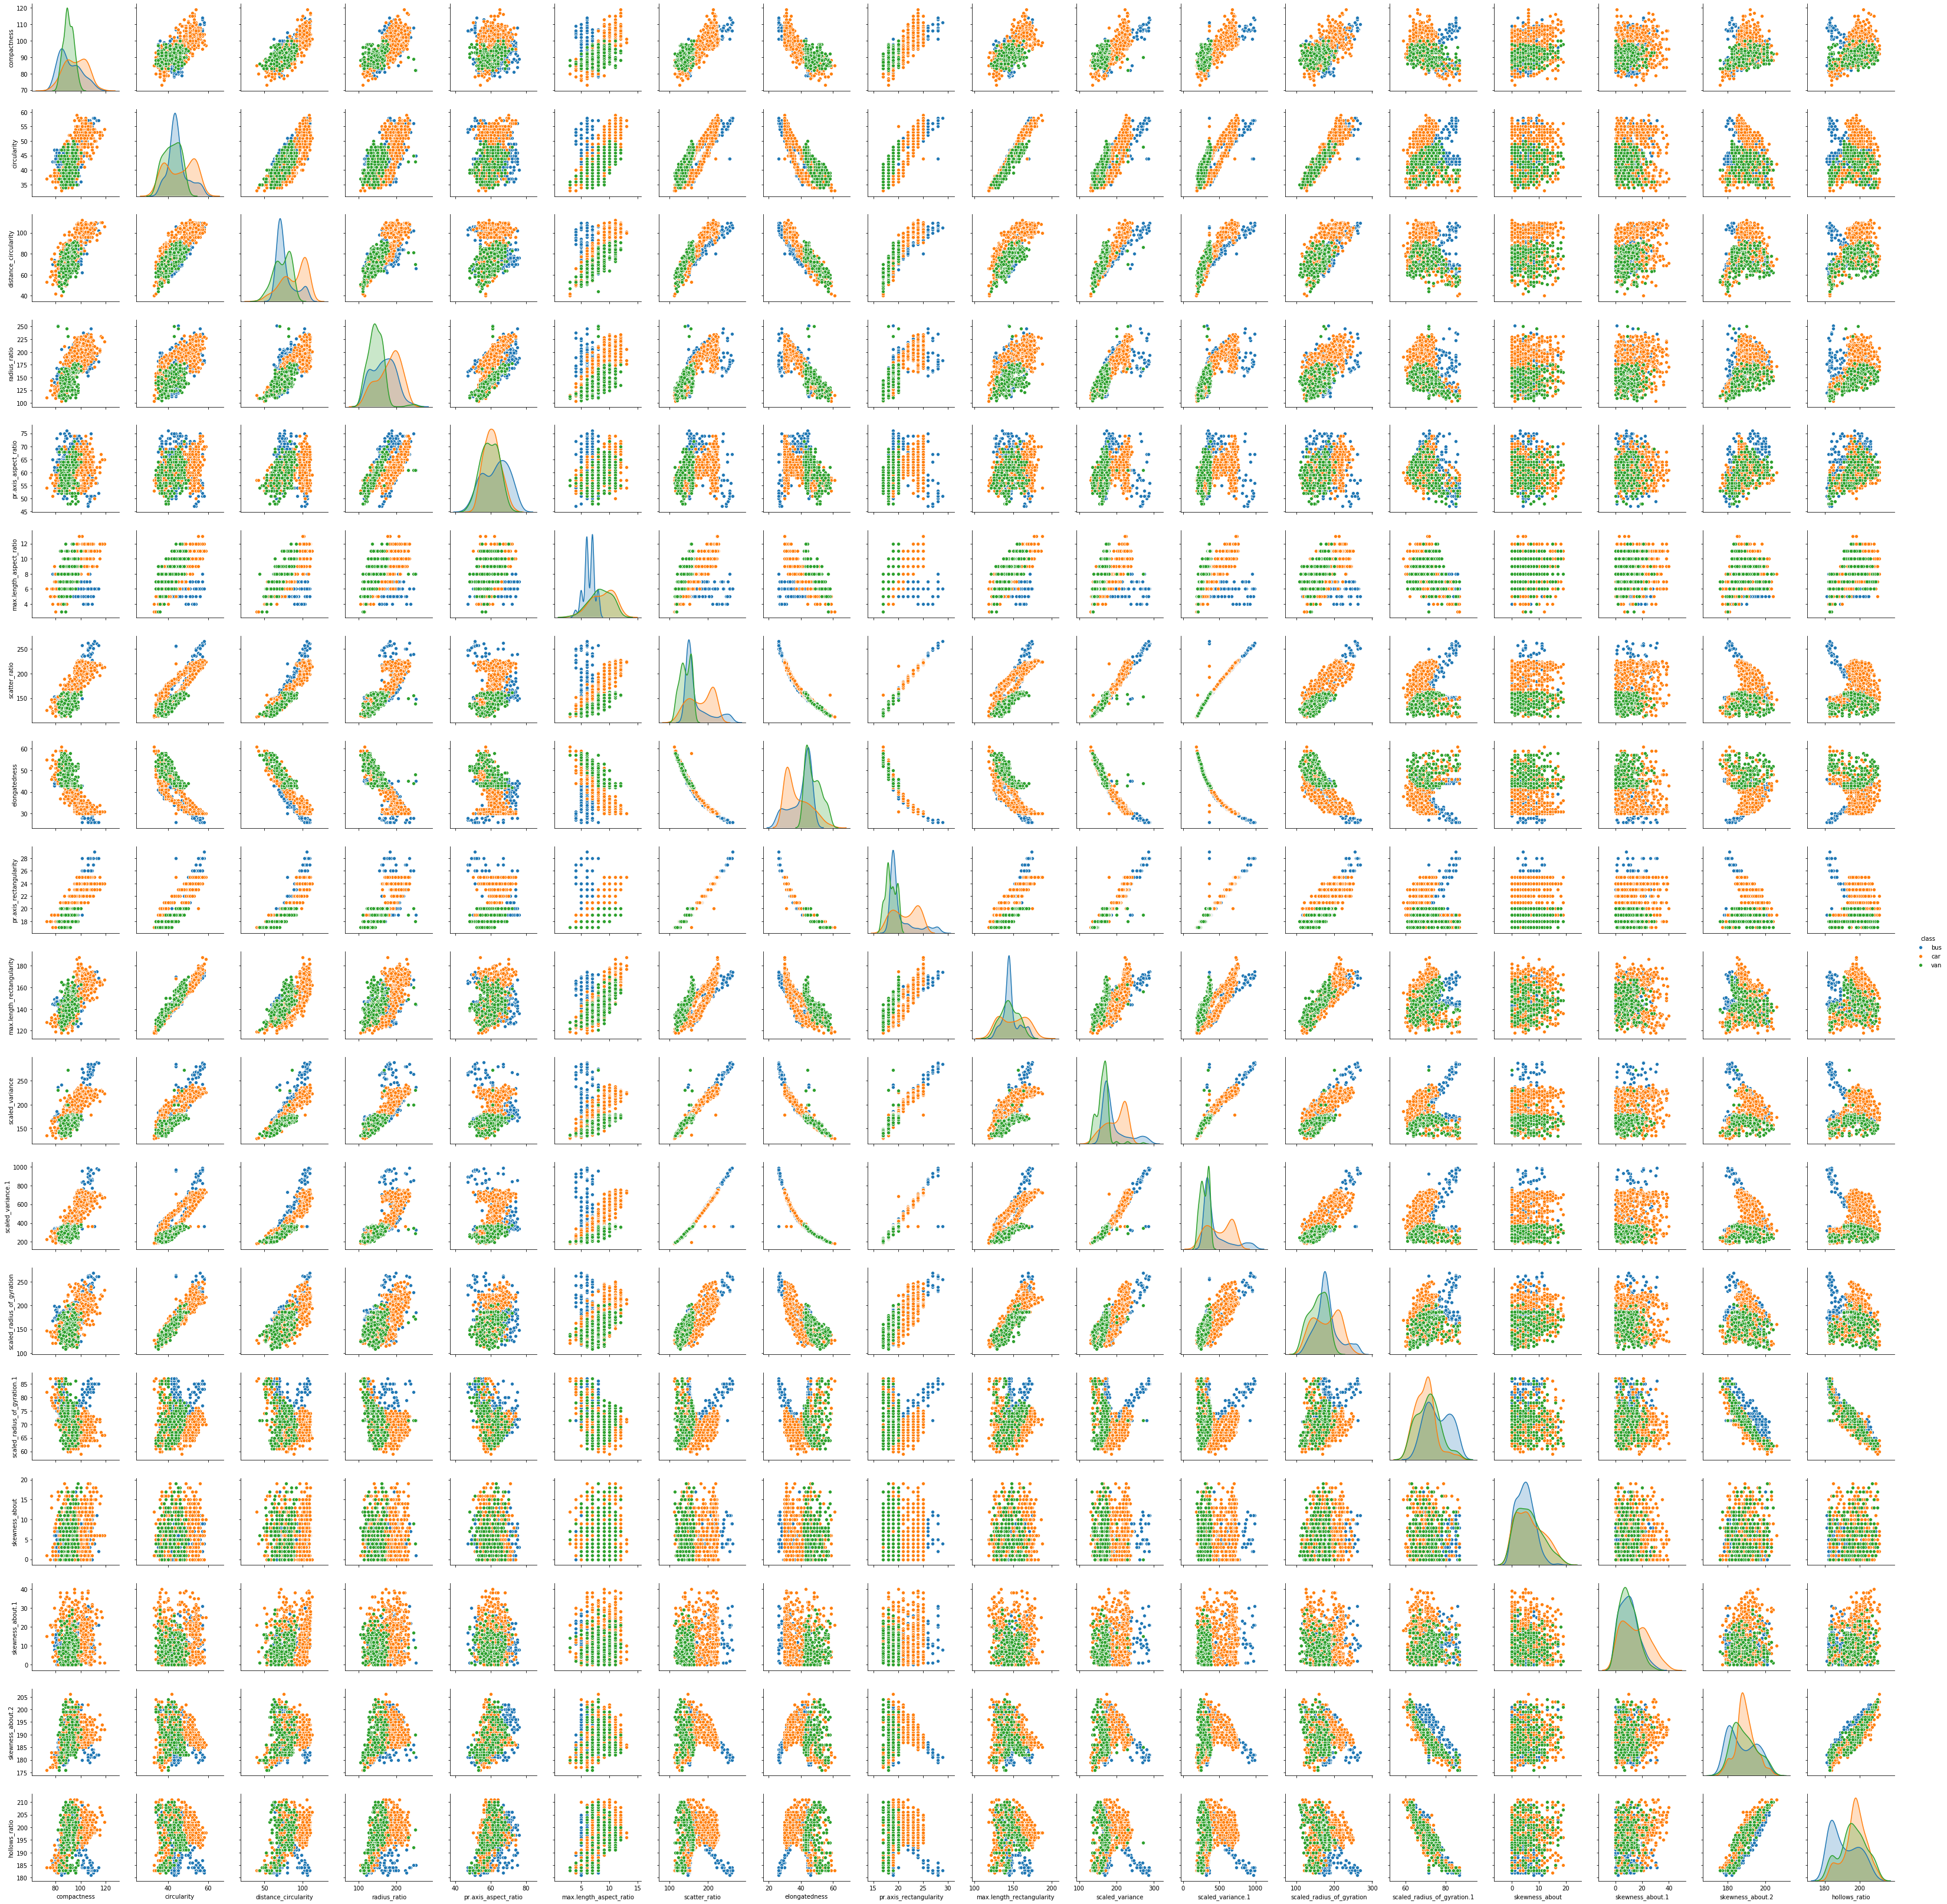

In [22]:
sns.pairplot(vehicle_raw, hue='class', diag_kind='kde')

### Encoding of categorical variables

In [23]:
labelencoder_X=LabelEncoder()
vehicle_raw['class']=labelencoder_X.fit_transform(vehicle_raw['class'])

In [24]:
vehicle_raw["class"].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

#### Observation:
Here post encoding 
* 0 represents Bus
* 1 represents Car
* 2 represents Van

In [25]:
#correlation matrix
cor=vehicle_raw.corr()
cor

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   
class                           -0.213948             -0.209298   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                            

Text(0.5, 1, 'Correlation Matrix of Data')

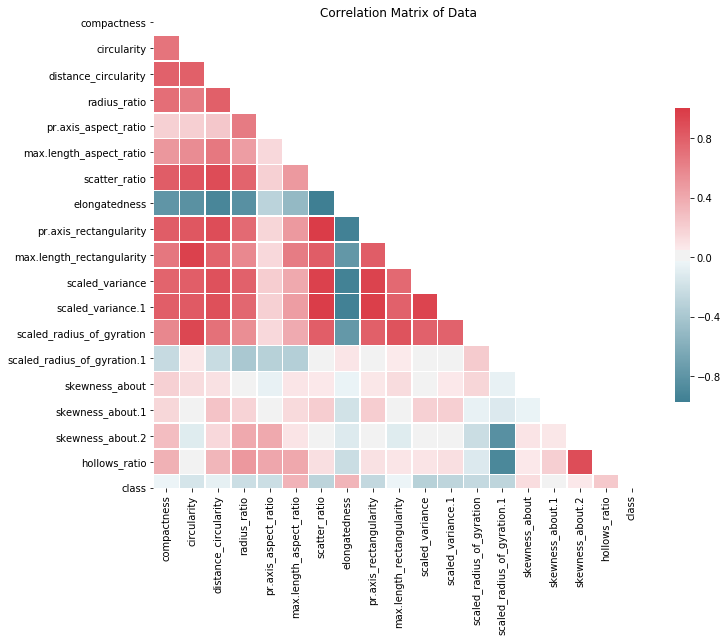

In [26]:
# Correlation matrix for all variables
corr = vehicle_raw.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, square = True, linewidths = .5, cbar_kws = {"shrink": .6})#, annot = True)
ax.set_title('Correlation Matrix of Data')

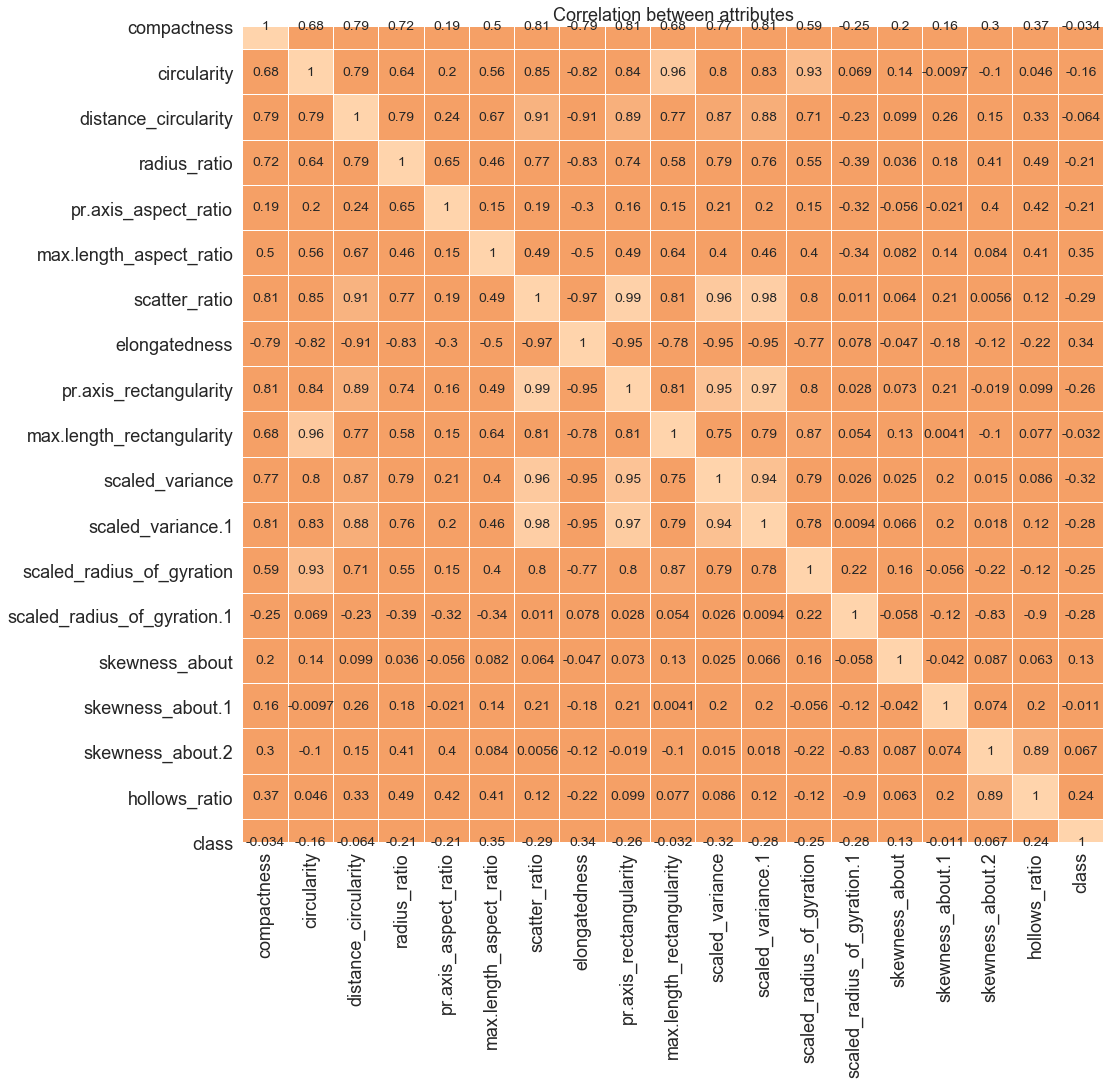

In [27]:
# correlation heatmap
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(corr,vmin=0.85,annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)

### Observation 
Below attributes have high correlation with multiple variables and hence can be dropped to avoid redundant attribute influence in the model
* scatter_ratio
* scaled_variance
* scaled_variance.1
* pr.axis_rectangularity

### Separating the dependent Variable

In [28]:
X = vehicle_raw.drop(['class'], axis=1)
y = vehicle_raw[['class']]

#### Drop the variable which have high colleration with mutiple other variables

In [29]:
X=X.drop(['scatter_ratio','scaled_variance','scaled_variance.1','pr.axis_rectangularity'], axis=1)

### Split data and creating the training set and test set in ration of 70:30

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [31]:
X_train1=pd.DataFrame(X_train).apply(zscore)
X_test1=pd.DataFrame(X_test).apply(zscore)

##  Support Vector Machine

In [32]:
# Building a Support Vector Machine on train data
svc_model = SVC()
svc_model=svc_model.fit(X_train1, y_train)
prediction = svc_model.predict(X_test1)
# check the accuracy, recall & precision on the test set
accuracy_SVM=metrics.accuracy_score(y_test, prediction)
recall_SVC=metrics.recall_score(y_test, prediction, average='macro')
precision_SVC=metrics.precision_score(y_test, prediction, average='macro')

In [33]:
# check the accuracy on the training data
print('Accuracy on Training data: ',svc_model.score(X_train1, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', svc_model.score(X_test1 , y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))
print("Recall Score:\n", recall_SVC)
print("Precision Score:\n", precision_SVC)

Accuracy on Training data:  0.964527027027027
Accuracy on Testing data:  0.9488188976377953
Confusion Matrix:
 [[ 57   1   2]
 [  1 129   5]
 [  1   3  55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.97      0.96      0.96       135
           2       0.89      0.93      0.91        59

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254

Recall Score:
 0.9410410937129593
Precision Score:
 0.9459196484620213


In [34]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_Matrix = pd.DataFrame({'Classification Model':['Support Vector Machine'], 'Accuracy': accuracy_SVM },index={'1'})
Accuracy_Matrix = Accuracy_Matrix[['Classification Model', 'Accuracy']]
Accuracy_Matrix

Classification Model  Accuracy
1  Support Vector Machine  0.948819

## K-fold cross validation - SVM

In [35]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = SVC()
results = cross_val_score(model, X_train1, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.91666667 1.         1.         0.91666667 1.         1.
 0.91666667 0.91666667 1.         0.91666667 1.         1.
 0.91666667 0.91666667 1.         0.91666667 1.         0.91666667
 1.         1.         1.         0.91666667 1.         0.91666667
 1.         0.91666667 1.         1.         0.91666667 0.83333333
 0.91666667 1.         1.         0.83333333 0.91666667 1.
 1.         0.91666667 1.         0.91666667 0.91666667 1.
 0.63636364 0.90909091 1.         0.90909091 1.         1.
 1.         1.        ]
Accuracy: 95.242% (6.575%)


In [36]:
#Store the accuracy results of each model in a dataframe for final comparison
accuracy_SVC_Kfold=results.mean()
Accuracy_SVC_Kfold = pd.DataFrame({'Classification Model':['Support Vector Machine - Kfold'], 'Accuracy': accuracy_SVC_Kfold},index={'2'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC_Kfold])
Accuracy_Matrix

Classification Model  Accuracy
1          Support Vector Machine  0.948819
2  Support Vector Machine - Kfold  0.952424

## Hyper Parameter Tuning - SVM

In [37]:
model = SVC()
param_grid = {'C':[0.01, 0.05, 0.5, 1],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']} #will define parameter grid
grid = GridSearchCV(model,param_grid,refit = True,scoring='accuracy', n_jobs= -1,cv=10, verbose=2)

grid = grid.fit(X_train1, y_train)
accuracy_SVC_grid = grid.best_score_
print((accuracy_SVC_grid*100),'%')
grid.best_params_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s


94.5945945945946 %


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    8.7s finished


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [38]:
print(grid.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [39]:
grid_predictions = grid.predict(X_test1)  
print("Confusion Matrix:\n",metrics.confusion_matrix(grid_predictions,y_test))
print("Classification Report:\n",metrics.classification_report(grid_predictions,y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, grid_predictions, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, grid_predictions, average='macro'))

Confusion Matrix:
 [[ 57   2   2]
 [  2 128   6]
 [  0   3  54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.96      0.94      0.95       136
           2       0.87      0.95      0.91        57

    accuracy                           0.94       254
   macro avg       0.93      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254

Recall value:  0.9331584839627775
Precision value:  0.9409903737163545


In [40]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_SVC_GR = pd.DataFrame({'Classification Model':['Support Vector Machine - Hyper Parameter Tuned'], 'Accuracy': accuracy_SVC_grid},index={'3'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC_GR])
Accuracy_Matrix

Classification Model  Accuracy
1                          Support Vector Machine  0.948819
2                  Support Vector Machine - Kfold  0.952424
3  Support Vector Machine - Hyper Parameter Tuned  0.945946

## Extract Principal Components Using PCA to capture about 95% of variance in data

In [41]:
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.300945   
1    -0.325470    -0.623732              0.120741     -0.850666   
2     1.254193     0.844303              1.519141      1.265808   
3    -0.082445    -0.623732             -0.006386     -0.290423   
4    -1.054545    -0.134387             -0.769150      1.141310   

   pr.axis_aspect_ratio  max.length_aspect_ratio  elongatedness  \
0              1.933135                 0.912212       0.136262   
1             -0.740596                 0.427456       0.520519   
2              0.863642                 0.912212      -1.144597   
3              0.328896                 0.427456       0.648605   
4             -0.027601                -0.057300       0.520519   

   max.length_rectangularity  scaled_radius_of_gyration  \
0                   0.758332                   0.285705   
1                  -0.344578                  -0.513630   
2                   0.689401                   1.392477   
3                  -0.344578                  -1.466683   
4                  -0.275646                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.315806       -0.032330          0.387162   
1                     0.009122        0.624090          0.161740   
2                     0.171586        1.718123         -0.401818   
3                    -1.453054       -0.032330         -0.289106   
4                    -0.072110        0.624090         -0.176395   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

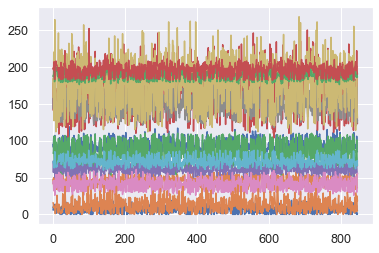

In [42]:
plt.plot(X)
plt.show()

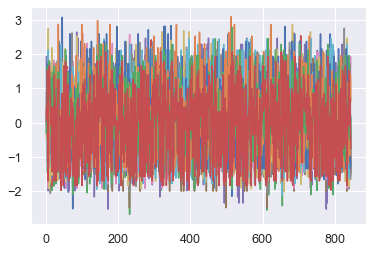

In [43]:
plt.plot(XScaled)
plt.show()

In [44]:
#covarience matrix of scaled data
covMatrix = np.cov(XScaled,rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
  -0.78968322  0.67694334  0.58593517 -0.24697246  0.19754181  0.1565327
   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
  -0.82244387  0.96245572  0.92691166  0.06882659  0.13651201 -0.00967793
  -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
  -0.9123854   0.77544391  0.70660663 -0.22962442  0.09922417  0.26265581
   0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
  -0.82636872  0.58015378  0.55142559 -0.39092105  0.03579728  0.17981316
   0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
  -0.29849719  0.14776643  0.14876723 -0.32144977 -0.05609621 -0.02111342
   0.401356    0.41622574]
 [ 0.50051942  0.5611334   0.66759792  0.46450748  0.15047265  1.00118343
  -0.50477756  0.64347365  0.39786723 -0.33584133  0.

In [45]:
#lets intialize and fit pca
pca = PCA(n_components=14)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
print(pca.explained_variance_) #explained variance of each attributes

[6.30700484 3.19339305 1.13044588 1.11060684 0.82080129 0.58386814
 0.29998669 0.21031593 0.12419844 0.07453032 0.06389232 0.04280185
 0.03296982 0.02175264]


#### The eigen Vectors

In [47]:
print(pca.components_) #principle components

[[-0.33827901 -0.34772735 -0.37271643 -0.34815685 -0.15920649 -0.27449035
   0.36543825 -0.34075427 -0.30578593  0.11667353 -0.05889281 -0.0661366
  -0.10258241 -0.16937744]
 [-0.01606053  0.22729121  0.03637992 -0.12910364 -0.22425042 -0.03004387
  -0.09009813  0.21830607  0.29708726  0.49146038  0.00920535 -0.09708284
  -0.49984435 -0.4837097 ]
 [ 0.1213135  -0.07085782  0.14321476 -0.21629087 -0.59545392  0.26163368
   0.02306747  0.00508891 -0.12187782 -0.08328859  0.25576636  0.6259128
  -0.06648945  0.07745406]
 [ 0.08144782  0.0679418  -0.09632535 -0.15005145 -0.16140447  0.03387246
   0.13508264  0.08183441  0.08493522 -0.11108662  0.77095612 -0.51795669
   0.13618297  0.06372377]
 [ 0.10126646 -0.0741659  -0.00343685  0.22789898  0.29939008 -0.5385938
  -0.13355558 -0.18795923  0.0526601   0.21752875  0.48750156  0.43215845
   0.05668055 -0.14726871]
 [ 0.41271035 -0.00505723  0.05484101 -0.01147902 -0.52075195 -0.5318938
  -0.21407562 -0.06398152  0.04691507 -0.01966377 -0.28

In [48]:
print(pca.explained_variance_ratio_) #explained variance of each attribute in percentage

[0.44996784 0.22782988 0.08065069 0.07923529 0.05855936 0.04165557
 0.02140229 0.01500481 0.00886083 0.0053173  0.00455834 0.00305366
 0.0023522  0.00155192]


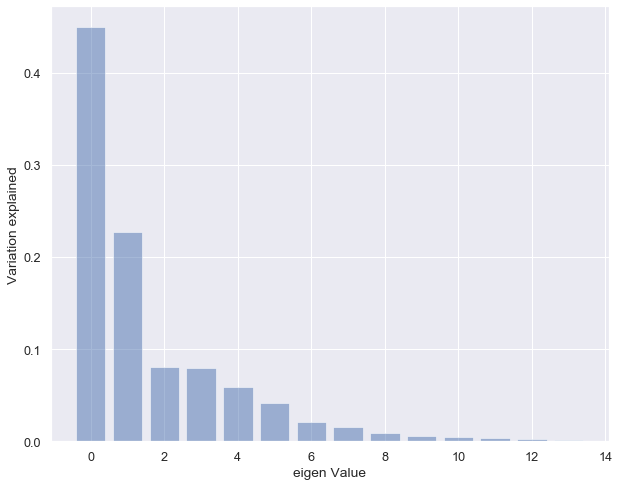

In [49]:
#lets visualize the contribution of variance of each attribute
plt.figure(figsize=(10,8))
plt.bar(list(range(14)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [50]:
# Cumulative variance explained
tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 44.99678393  67.77977214  75.84484111  83.76837013  89.62430641
  93.78986346  95.93009275  97.43057367  98.31665675  98.8483869
  99.30422117  99.6095873   99.84480766 100.        ]


### 7 Principal Components captures 95% of variance in the data

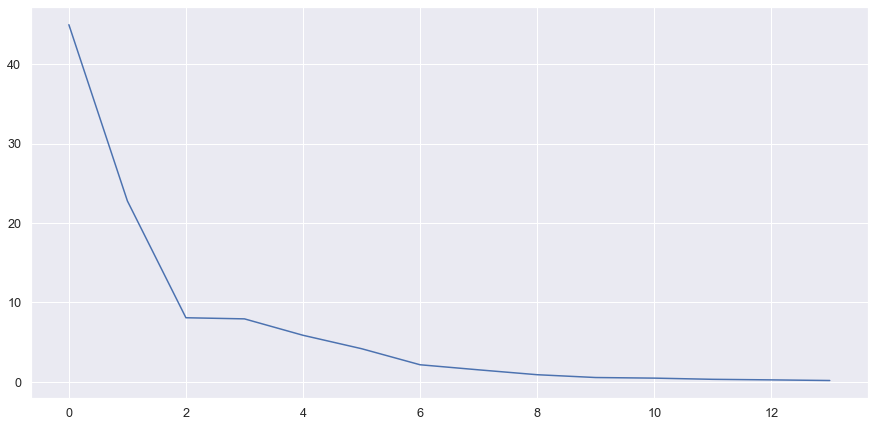

In [51]:
plt.figure(figsize = (15 , 7.2))
plt.plot(var_exp)

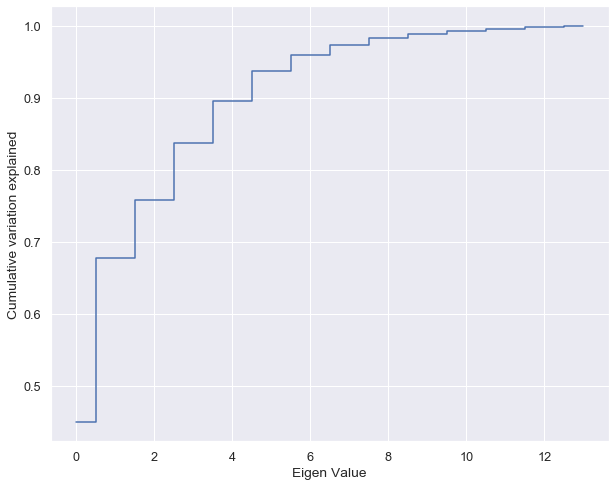

In [52]:
#we can see 5 attributes explaines 95% of variance overall.
plt.figure(figsize=(10,8))
plt.step(list(range(14)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative variation explained')
plt.xlabel('Eigen Value')
plt.show()

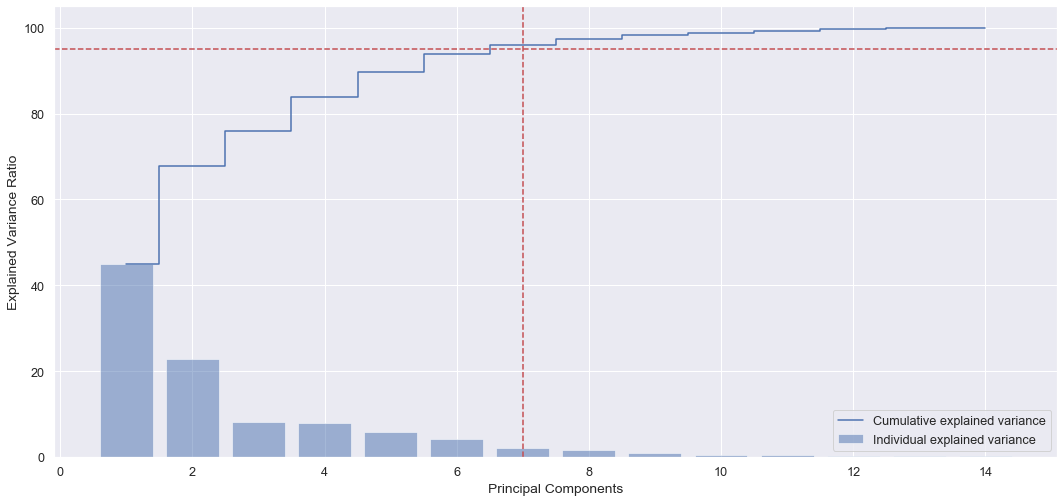

In [53]:
# Ploting 
plt.figure(figsize = (15 , 7.2))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.axhline(y = 95, color = 'r', linestyle = '--')
plt.axvline(x = 7, color = 'r', linestyle = '--')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Observation:
* From the above graphical representation it's clear that 7 Principal Components captures 95% of variance in the data

## Dimensionality Reduction using PCA  (New Dimension = 7)

In [54]:
# Reducing the dimensionality from 14 to 7
pca7 = PCA(n_components=7)
pca7.fit(XScaled)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
Xpca7 = pca7.transform(XScaled)

[[-0.33827901 -0.34772735 -0.37271643 -0.34815685 -0.15920649 -0.27449035
   0.36543825 -0.34075427 -0.30578593  0.11667353 -0.05889281 -0.0661366
  -0.10258241 -0.16937744]
 [-0.01606053  0.22729121  0.03637992 -0.12910364 -0.22425042 -0.03004387
  -0.09009813  0.21830607  0.29708726  0.49146038  0.00920535 -0.09708284
  -0.49984435 -0.4837097 ]
 [ 0.1213135  -0.07085782  0.14321476 -0.21629087 -0.59545392  0.26163368
   0.02306747  0.00508891 -0.12187782 -0.08328859  0.25576636  0.6259128
  -0.06648945  0.07745406]
 [ 0.08144782  0.0679418  -0.09632535 -0.15005145 -0.16140447  0.03387246
   0.13508264  0.08183441  0.08493522 -0.11108662  0.77095612 -0.51795669
   0.13618297  0.06372377]
 [ 0.10126646 -0.0741659  -0.00343685  0.22789898  0.29939008 -0.5385938
  -0.13355558 -0.18795923  0.0526601   0.21752875  0.48750156  0.43215845
   0.05668055 -0.14726871]
 [ 0.41271035 -0.00505723  0.05484101 -0.01147902 -0.52075195 -0.5318938
  -0.21407562 -0.06398152  0.04691507 -0.01966377 -0.28

In [55]:
print(Xpca7.shape)

(846, 7)


#### Observation:
* Clearly dimensions have been reduced to 7 from 14

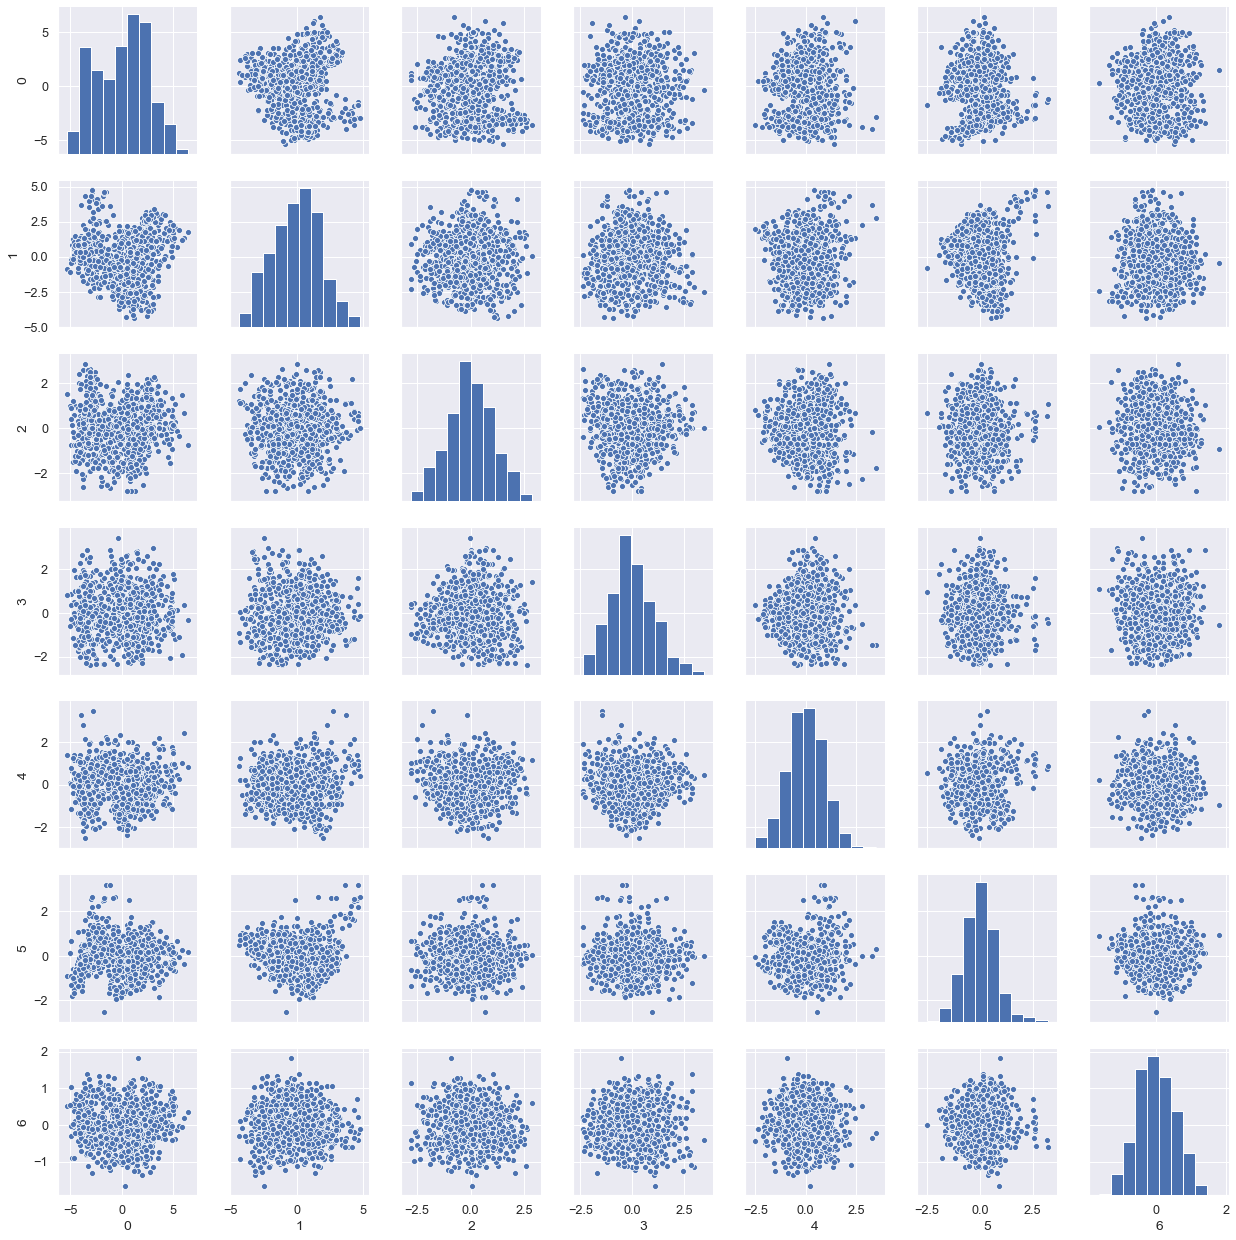

In [56]:
sns.pairplot(pd.DataFrame(Xpca7)) #pair plot on pca data

#### Observation
* PCA componenets are no longer having any correlation among the compotents
* Components are quite independent from each other and normally distributed

### Split the PCA data into train and test set 

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(Xpca7, y, test_size=0.30, random_state=1)

## Support Vector Machine using Reduced dimension from PCA

In [58]:
svc_model = svm.SVC()
svc_model=svc_model.fit(X_train,Y_train)
prediction = svc_model.predict(X_test)
# check the accuracy on the test set
accuracy_SVM=metrics.accuracy_score(y_test, prediction)
print(metrics.confusion_matrix(Y_test, prediction))
print(classification_report(Y_test,prediction))
print('Accuracy of PCA Applied SVM: ',accuracy_SVM)

[[ 57   1   1]
 [  1 122  10]
 [  3  10  49]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.92      0.92      0.92       133
           2       0.82      0.79      0.80        62

    accuracy                           0.90       254
   macro avg       0.89      0.89      0.89       254
weighted avg       0.90      0.90      0.90       254

Accuracy of PCA Applied SVM:  0.8976377952755905


#### Observation:
* There has been a reduction in the accuracy using PCA
* With reduction of dimension to 7 the reduction of accuracy is acceptable as PCA helped to handle the model with much lesser number of dimension

In [59]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_SVC_PCA = pd.DataFrame({'Classification Model':['SVM (PCA)'], 'Accuracy': accuracy_SVM},index={'4'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC_PCA])
Accuracy_Matrix

Classification Model  Accuracy
1                          Support Vector Machine  0.948819
2                  Support Vector Machine - Kfold  0.952424
3  Support Vector Machine - Hyper Parameter Tuned  0.945946
4                                       SVM (PCA)  0.897638

## Hyperparameter Tuning of Support Vector Machine (PCA Applied)

In [60]:
model = SVC()
param_grid = {'C':[0.01, 0.05, 0.5, 1],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']} #will define parameter grid
grid = GridSearchCV(model,param_grid,refit = True,scoring='accuracy', n_jobs= -1,cv=10, verbose=2)

grid = grid.fit(X_train, Y_train)
accuracy_SVC_grid = grid.best_score_
print((accuracy_SVC_grid*100),'%')
grid.best_params_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


90.54054054054053 %


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    2.0s finished


{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

In [61]:
svc_model = svm.SVC(C=0.5, kernel='rbf',gamma=0.1)
svc_model=svc_model.fit(X_train,Y_train)
prediction = svc_model.predict(X_test)
# check the accuracy on the test set
accuracy_SVM_hyp=metrics.accuracy_score(y_test, prediction)
print(metrics.confusion_matrix(Y_test, prediction))
print(classification_report(Y_test,prediction))
print('Accuracy of PCA Applied SVM after Hyperparameter Tuning: ',accuracy_SVM_hyp)

recall_SVC=metrics.recall_score(Y_test, prediction, average='macro')
precision_SVC=metrics.precision_score(Y_test, prediction, average='macro')
print("Recall Score:\n", recall_SVC)
print("Precision Score:\n", precision_SVC)

[[ 54   4   1]
 [  2 124   7]
 [  3  11  48]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.89      0.93      0.91       133
           2       0.86      0.77      0.81        62

    accuracy                           0.89       254
   macro avg       0.89      0.87      0.88       254
weighted avg       0.89      0.89      0.89       254

Accuracy of PCA Applied SVM after Hyperparameter Tuning:  0.889763779527559
Recall Score:
 0.8739262042476339
Precision Score:
 0.8881611417887482


In [62]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_SVC_PCA = pd.DataFrame({'Classification Model':['Support Vector Machine(PCA)- Hyper Parameter Tuning'], 'Accuracy': accuracy_SVM_hyp},index={'5'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC_PCA])
Accuracy_Matrix

Classification Model  Accuracy
1                             Support Vector Machine  0.948819
2                     Support Vector Machine - Kfold  0.952424
3     Support Vector Machine - Hyper Parameter Tuned  0.945946
4                                          SVM (PCA)  0.897638
5  Support Vector Machine(PCA)- Hyper Parameter T...  0.889764

## KFold Cross Validation of Support Vector Machine (PCA Applied)

In [63]:
num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = svm.SVC(C=0.5, kernel='rbf',gamma=0.1)
results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
accuracy_SVM_PCA_CVAL=results.mean()

[0.93333333 0.93333333 0.93220339 0.89830508 0.89830508 0.91525424
 0.93220339 0.88135593 0.81355932 0.93220339]
Accuracy: 90.701% (3.592%)


In [64]:
#Store the accuracy results of each model in a dataframe for final comparison
Accuracy_SVC_PCA = pd.DataFrame({'Classification Model':['SVM (PCA)-KFold Cross Validation'], 'Accuracy': accuracy_SVM_PCA_CVAL},index={'6'})
Accuracy_Matrix = pd.concat([Accuracy_Matrix, Accuracy_SVC_PCA])
Accuracy_Matrix

Classification Model  Accuracy
1                             Support Vector Machine  0.948819
2                     Support Vector Machine - Kfold  0.952424
3     Support Vector Machine - Hyper Parameter Tuned  0.945946
4                                          SVM (PCA)  0.897638
5  Support Vector Machine(PCA)- Hyper Parameter T...  0.889764
6                   SVM (PCA)-KFold Cross Validation  0.907006

## Compare performances of all the models

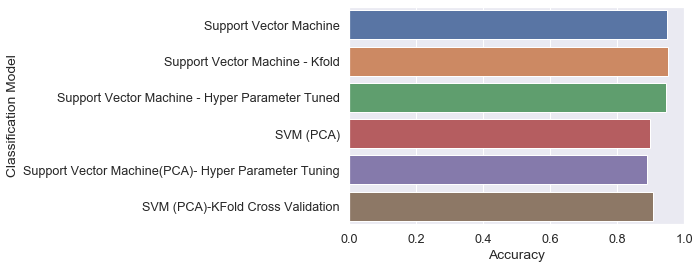

In [65]:
ax = sns.barplot(y="Classification Model", x="Accuracy", data=Accuracy_Matrix,  ci=200)

## Conclusion

* The given data set had 18 features and from the pair plot & correlation matrix the number of features were reduced to 14. Attributes with high correlations were eleminated at the first step.
* Further to classify a given silhouette as one of three types of vehicle (Car, Bus or Van) using a set of features extracted from the silhouette Support Vector Machine was adopted. SVM model resulted an accuracy of 95% which is good. Applying hyperparameter tuning and KFold Cross validation allowed to improve the performance slightly. 
* However, as the objective is to reduce the dimentionality to fit any new data easily PCA was applied. PCA helped to reduce the dimensions from 14 to 7. 
* With 7 Dimension an accuracy of 89.76% was achived. This is certainly less than the original SVM but here the accuracy is achived with only 7 dimensions instead on 14 dimension which makes this more suitable model to choose. 
* The 7 Principal Components captured more than 95% of the variance in the data
* Post applying PCA in the SVM model, with Hyper Parameter tuning and KFold Cross Validation accuracy slighly improved to above 90%
* This means a sacrifice of 5% of accuracy with PCA but as the number of dimension reduced 50% (from 14 to 7) it will be a right choice to adopt PCA in this use case
* Also in this use case the features related to the silhouette of three types of vehicle don't have much explanaible characteristics and hence it would a right choice to adopt PCA in this case.

#### Hence, adopting PCA with KFold Cross validation is the right choice in this case to classify a silhouette as one of three types of vehicle (Car, Bus or Van).

## Thank you